## Student Performance Indicator

##### Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

#### 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

#### 2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

##### 2.1 Import Data and Required Packages


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##### Import CSV data as Dataframe file

In [2]:
df = pd.read_csv(r'data\Student.csv')

# Show top 5 records
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Shape of the dataset

In [3]:
df.shape

(1000, 8)

##### 2.2 Dataset information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

#### 3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### Check missing value

In [4]:
# df.isnull().sum()
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### Check duplicates

In [5]:
df.duplicated().sum()
# df.drop_duplicates()

np.int64(0)

##### Check datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### Check number of unique values

In [7]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

##### Check stats of data

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Exploring data

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

Categories in 'gender' variable:  ['female' 'male']


In [11]:
print("Categories in 'race/ethinicity' variable: ", end=" ")
print(df['race/ethnicity'].unique())

Categories in 'race/ethinicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']


In [12]:
print("Categories in 'parental level of educarion' variable:", end=" ")
print(df['parental level of education'].unique())

Categories in 'parental level of educarion' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [13]:
print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())

Categories in 'lunch' variable:  ['standard' 'free/reduced']


In [14]:
print("Categories in 'test preparation course' varaible: ", end=" ")
print(df['test preparation course'].unique())

Categories in 'test preparation course' varaible:  ['none' 'completed']


In [15]:
# define numerical & categorical variable
num_var = [feature for feature in df.columns if df[feature].dtype != 'O']
print(f'We have {len(num_var)} numeric featuers: {num_var}')

We have 3 numeric featuers: ['math score', 'reading score', 'writing score']


In [16]:
cat_var = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f'We have {len(cat_var)}, categorical feature: {cat_var}')

We have 5, categorical feature: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


##### Adding columns for Total Score & Average

In [17]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full = df[df['reading score'] == 100]['average'].count()
print(f"Number of students with full reading marks: {reading_full}")

Number of students with full reading marks: 17


In [19]:
write_full = df[df['writing score'] == 100]['average'].count()
print(f"Number of students with full writing marks: {write_full}")

Number of students with full writing marks: 14


In [20]:
math_full = df[df['math score'] == 100]['average'].count()
print(f"Number of students with full marks in Maths: {math_full}")

Number of students with full marks in Maths: 7


In [21]:
reading_less = df[df['reading score'] <= 20]['average'].count()
print(f'Number of student with less than 20 in Reading: {reading_less}')

Number of student with less than 20 in Reading: 1


In [22]:
writing_less = df[df['writing score'] <= 20]['average'].count()
print(f"Number of student with less then 20 in Writing: {writing_less}")

Number of student with less then 20 in Writing: 3


In [23]:
math_less = df[df['math score'] <=20]['average'].count()
print(f"Number of student with less than 20 in Maths: {math_less}")

Number of student with less than 20 in Maths: 4


#### 4. Exploring Data ( Visualization )

##### 4.1 Visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

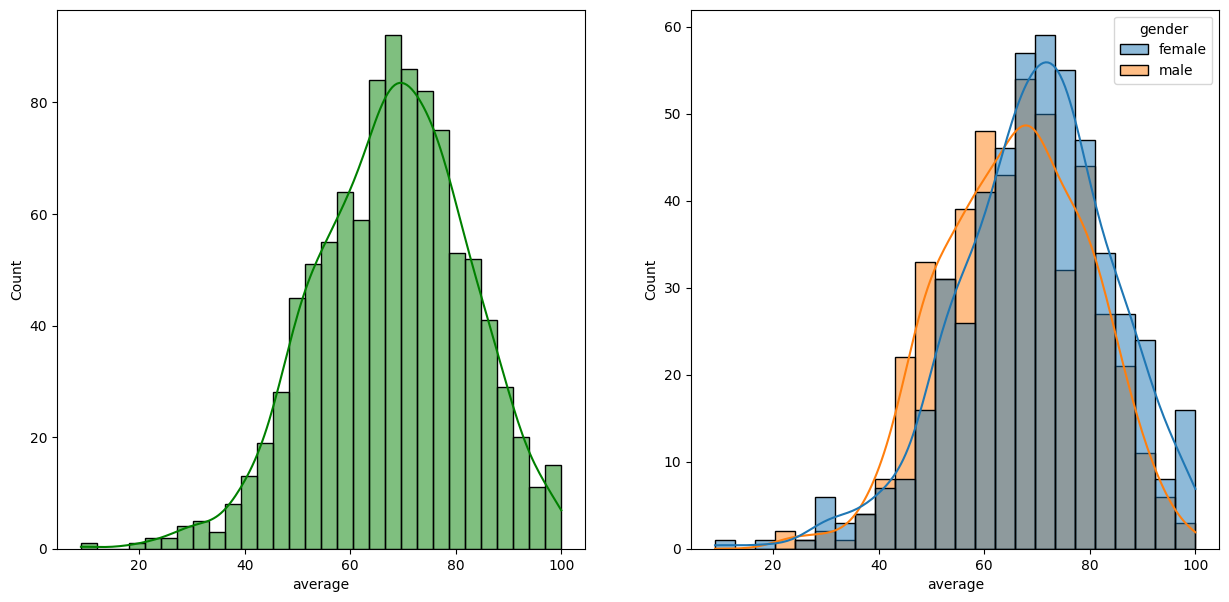

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')

plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

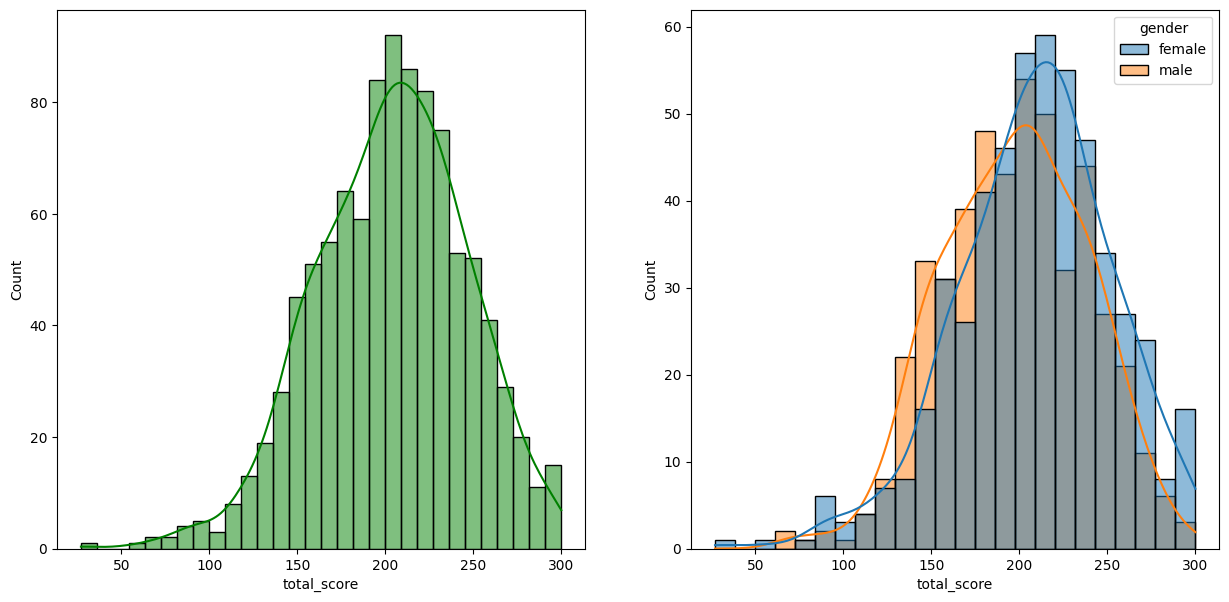

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')

plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

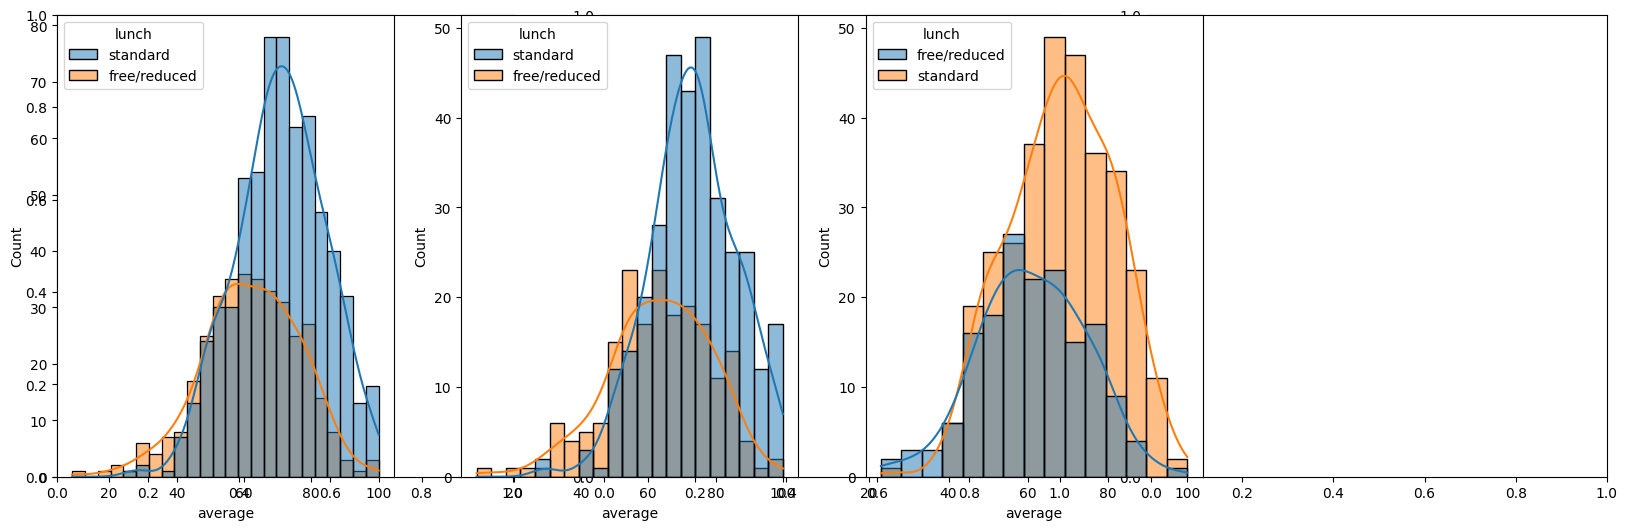

In [26]:
plt.subplots(1,3,figsize=(20,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')

plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

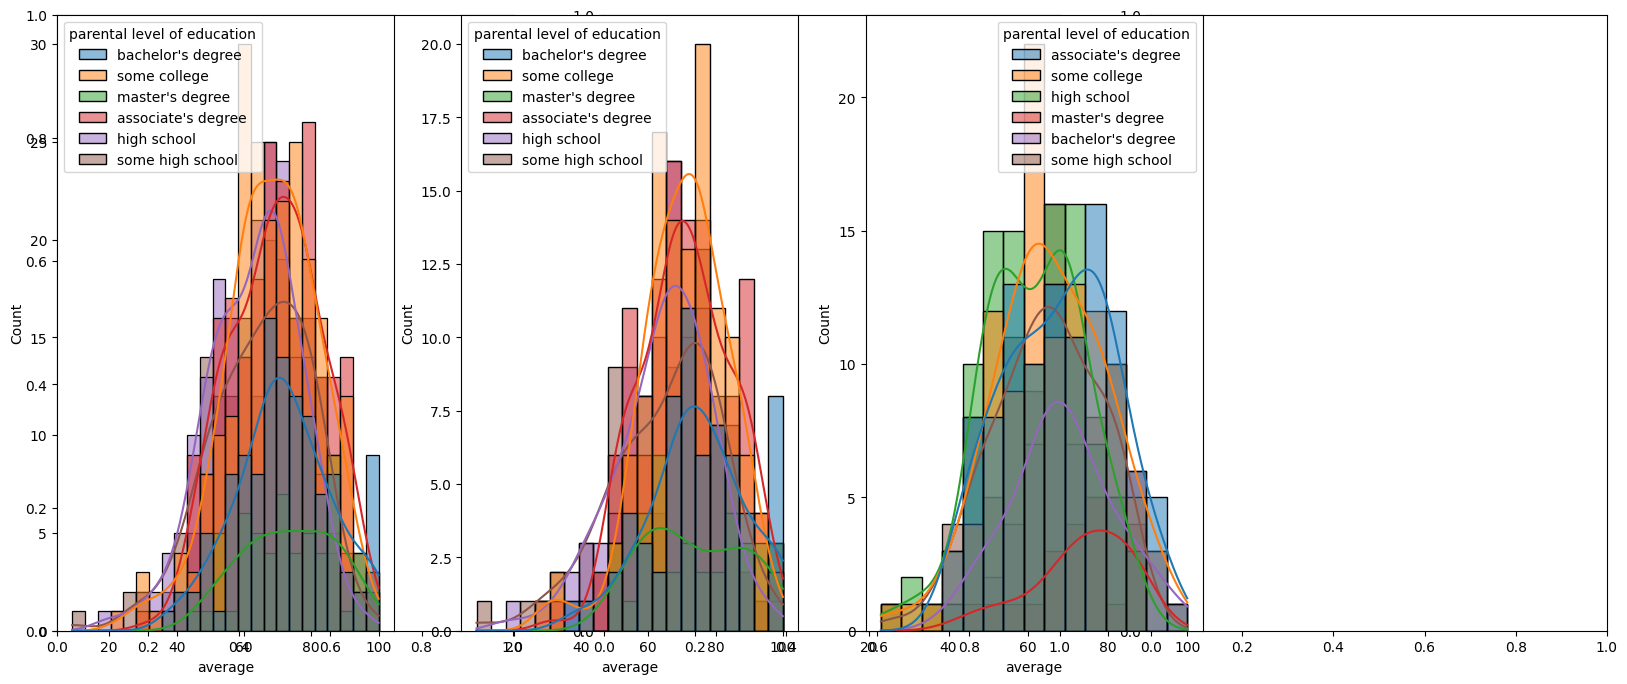

In [27]:
plt.subplots(1,3,figsize=(20,8))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')

plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.show()

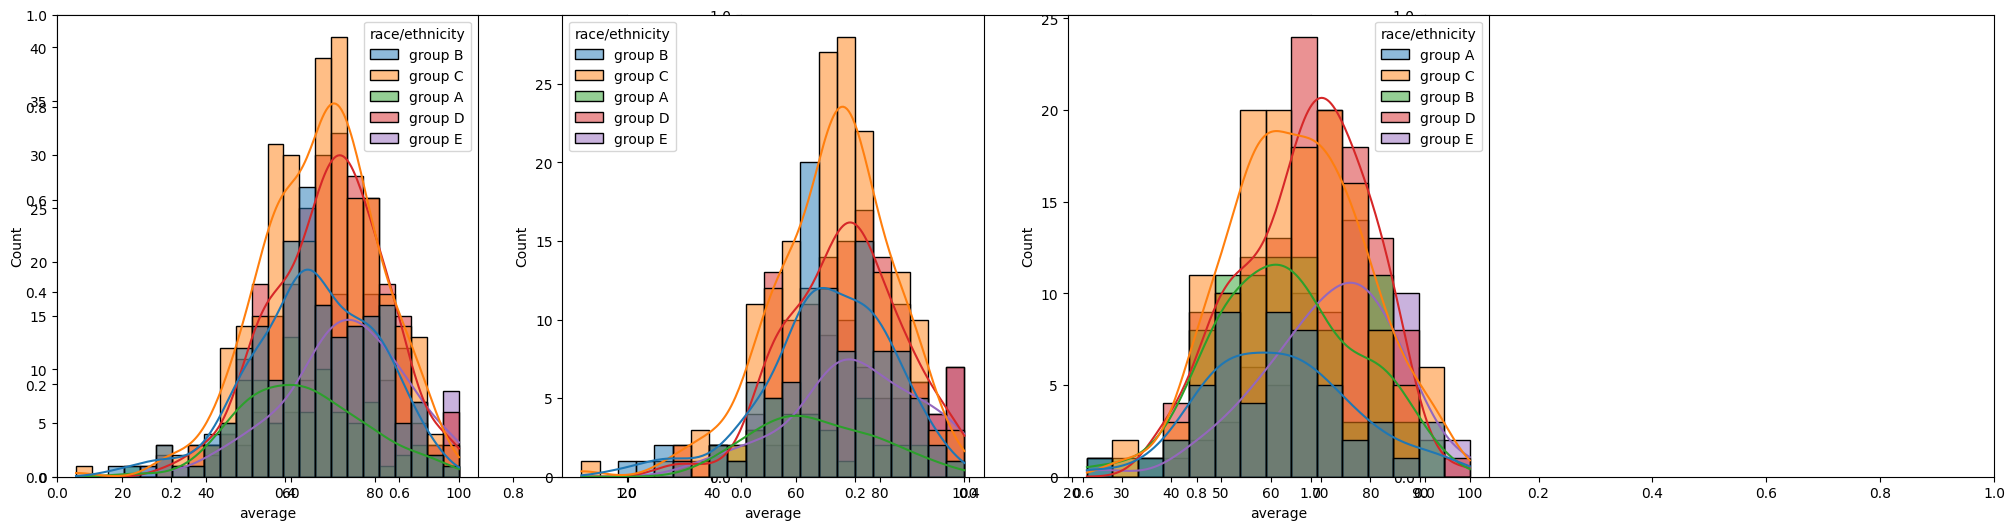

In [28]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')

plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

##### Maximum score of students in all three subjects

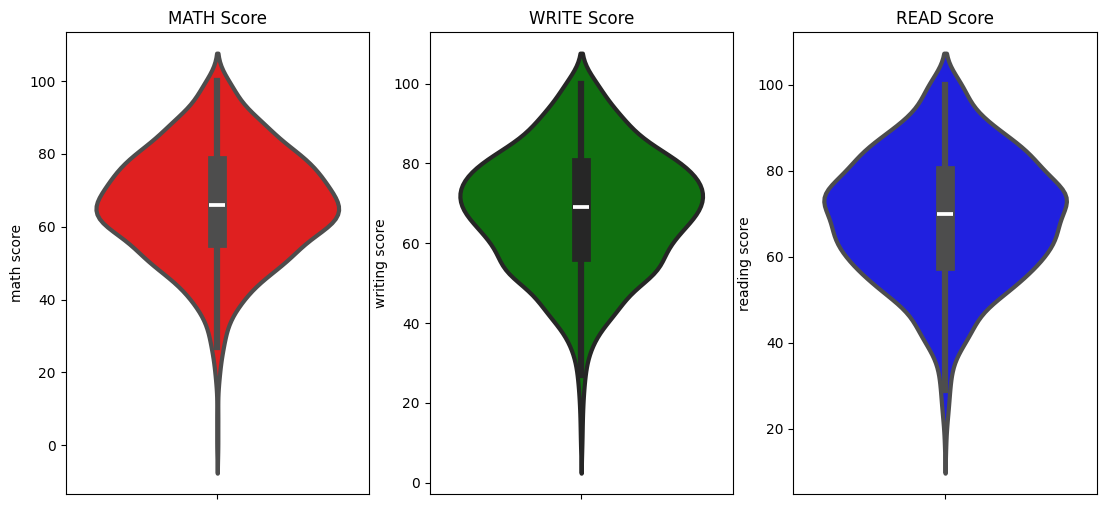

In [29]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 4, 1)
plt.title('MATH Score')
sns.violinplot(data=df, y='math score', color='red', linewidth=3)

plt.subplot(1, 4, 2)
plt.title('WRITE Score')
sns.violinplot(data=df, y='writing score', color='green', linewidth=3)

plt.subplot(1, 4, 3)
plt.title('READ Score')
sns.violinplot(data=df, y='reading score', color='blue', linewidth=3)
plt.show()


##### Multivariate analysis using pieplot

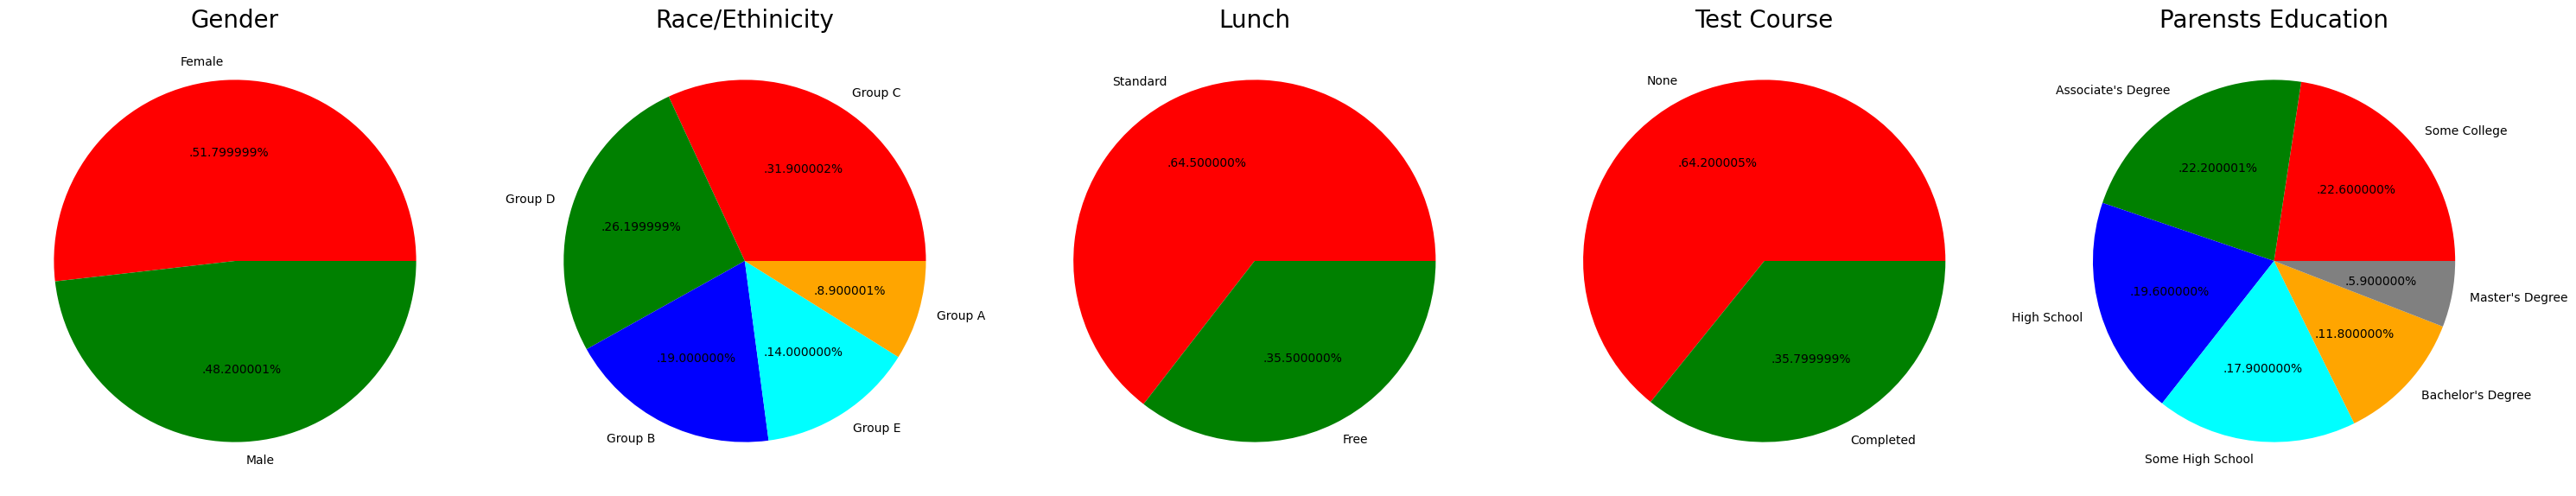

In [30]:
plt.rcParams['figure.figsize'] = (30, 12)

size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = 'Red', 'Green'

plt.subplot(1, 5, 1)
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.subplot(1, 5, 2)
plt.pie(size, labels=labels, colors=color, autopct='.%2f%%')
plt.title("Race/Ethinicity", fontsize=20)
plt.axis('off')

size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.subplot(1, 5, 3)
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.subplot(1, 5, 4)
plt.pie(size, labels=labels, colors=color, autopct='.%2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.subplot(1, 5, 5)
plt.pie(size, labels=labels, colors=color, autopct='.%2f%%')
plt.title('Parensts Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

#### Feature wise visualization

##### Univariate Analysis (How is Gender distributed)

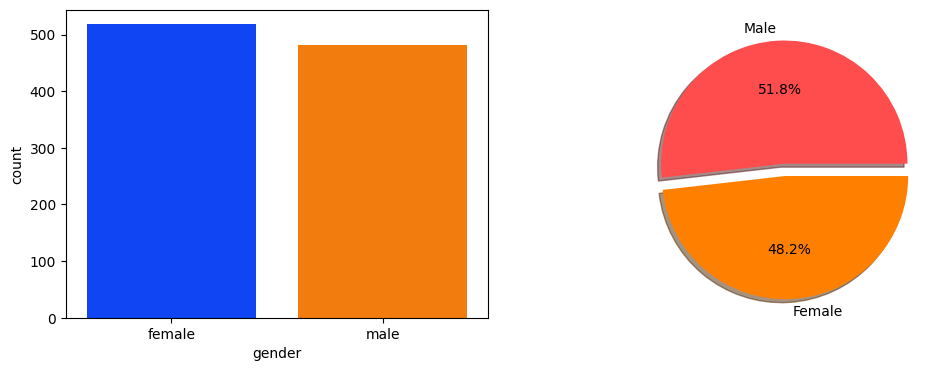

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=df, x='gender', palette='bright', ax=ax[0], saturation=0.9)

plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

##### Is Race / Ethinicity has an impact on students performance

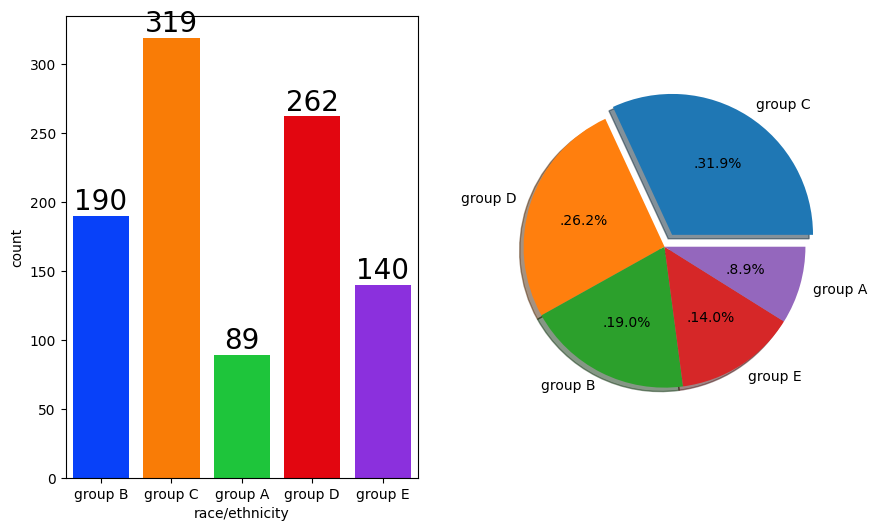

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.countplot(x=df['race/ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index, explode=[0.1, 0, 0, 0, 0], autopct='.%1.1f%%', shadow=True)
plt.show()

##### What is Educational background of students parent

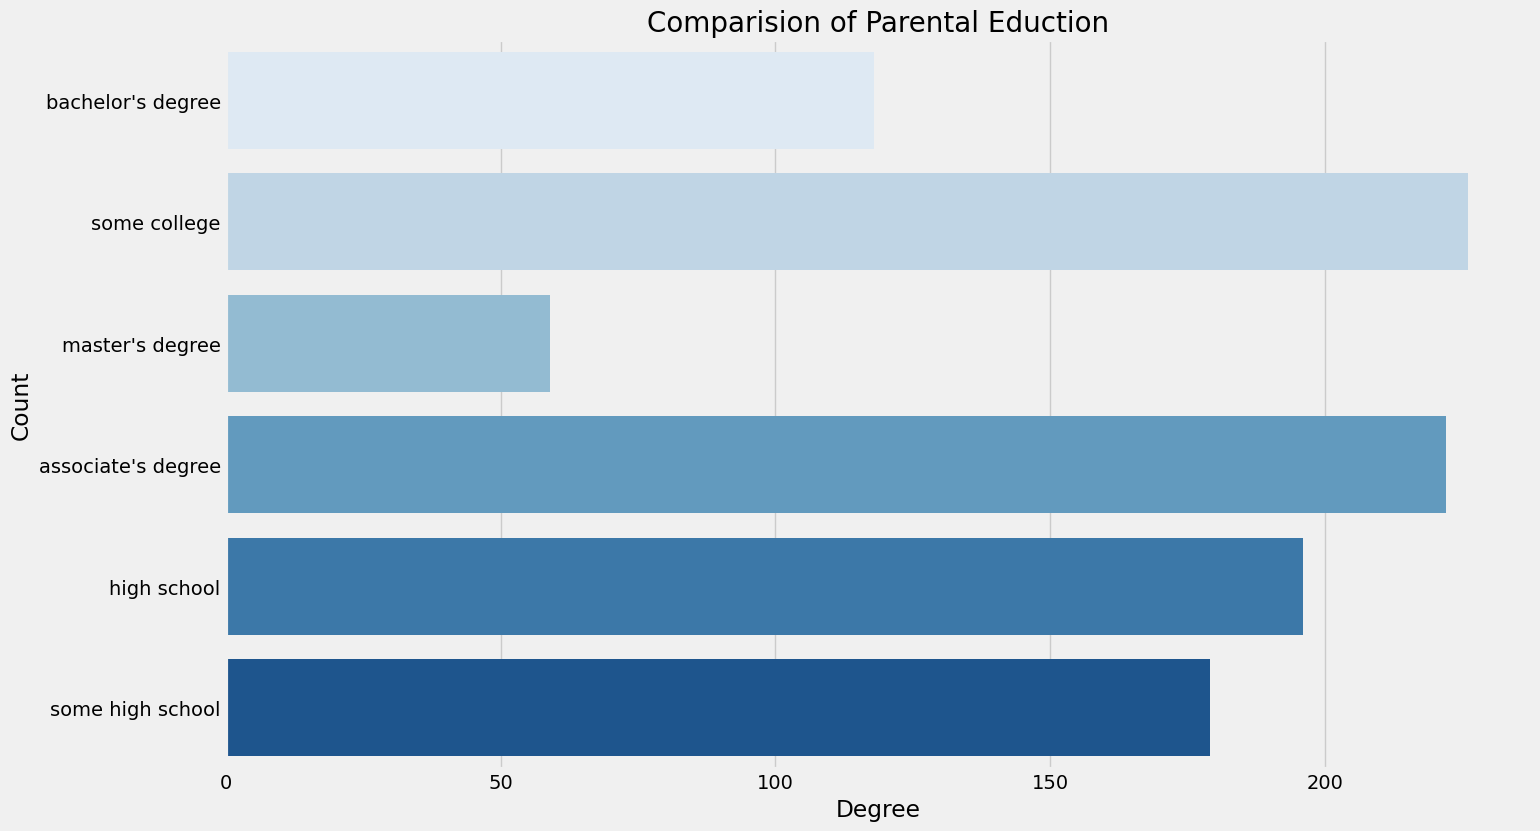

In [33]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette='Blues')
plt.title('Comparision of Parental Eduction', fontweight=28, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

##### Which type of lunch is most common amoung students ?

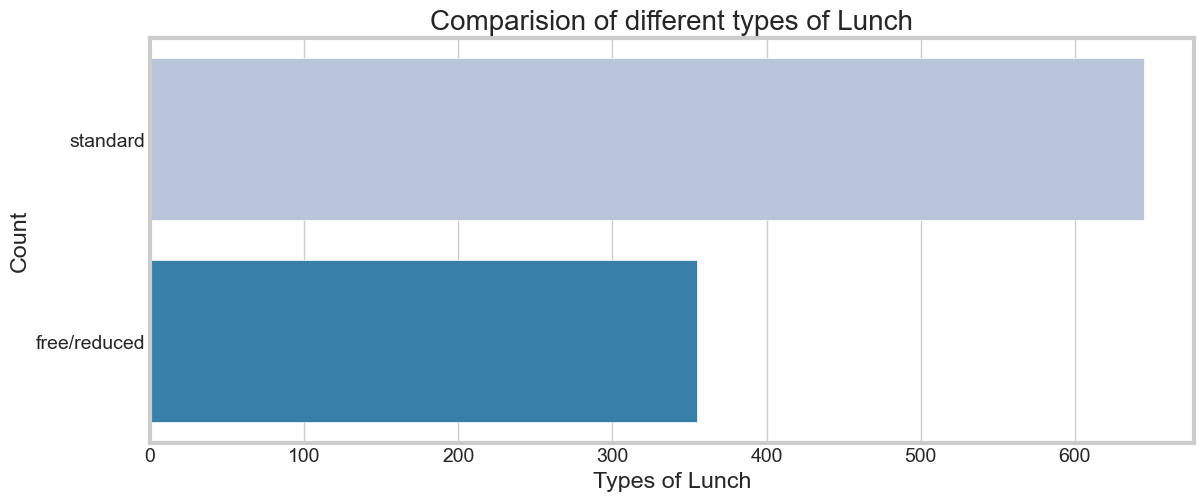

In [34]:
plt.rcParams['figure.figsize'] = (12, 5)
sns.set_style("whitegrid")
sns.countplot(df['lunch'], palette='PuBu')
plt.title('Comparision of different types of Lunch', fontsize=20, fontweight=28)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')
plt.show()

##### Bivariate Analysis (Is Gender have any impact on student performance)

In [35]:
gender_group = df.assign().groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


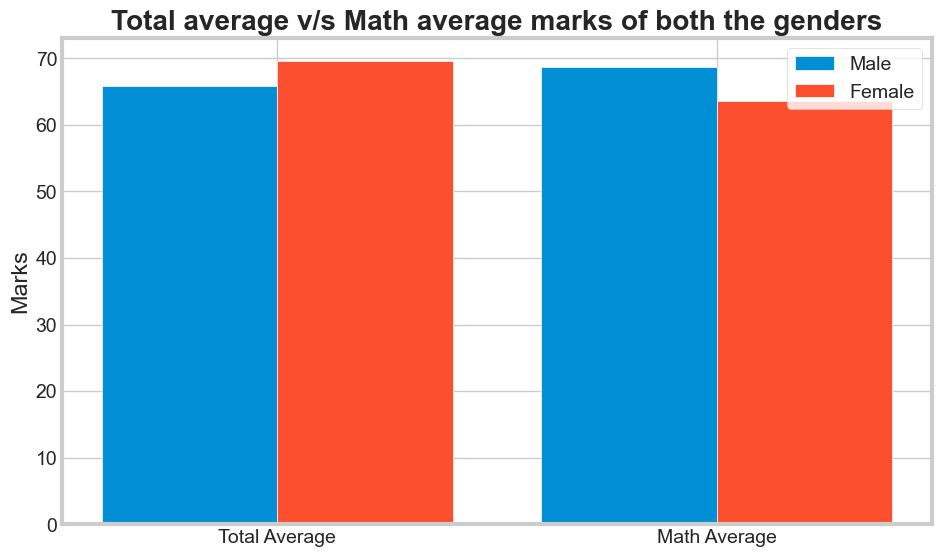

In [36]:
plt.figure(figsize=(10, 6))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

##### Is Race / Ethinicity has an impact on students performance

In [37]:
group_data = df.groupby('race/ethnicity')
group_data

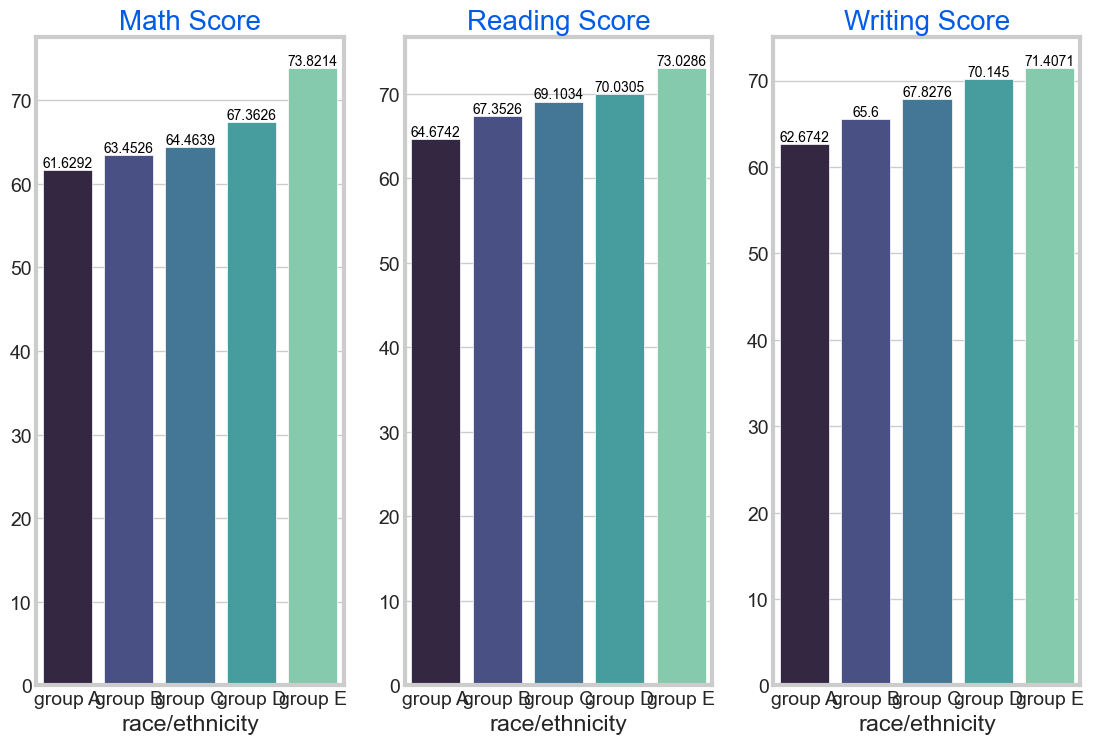

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(12, 8))
sns.barplot(x=group_data['math score'].mean().index, y=group_data['math score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=10)

sns.barplot(x=group_data['reading score'].mean().index, y=group_data['reading score'].mean().values, palette='mako', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=10)

sns.barplot(x=group_data['writing score'].mean().index, y=group_data['writing score'].mean().values, palette='mako', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=10)


##### What is Educational background of students parent

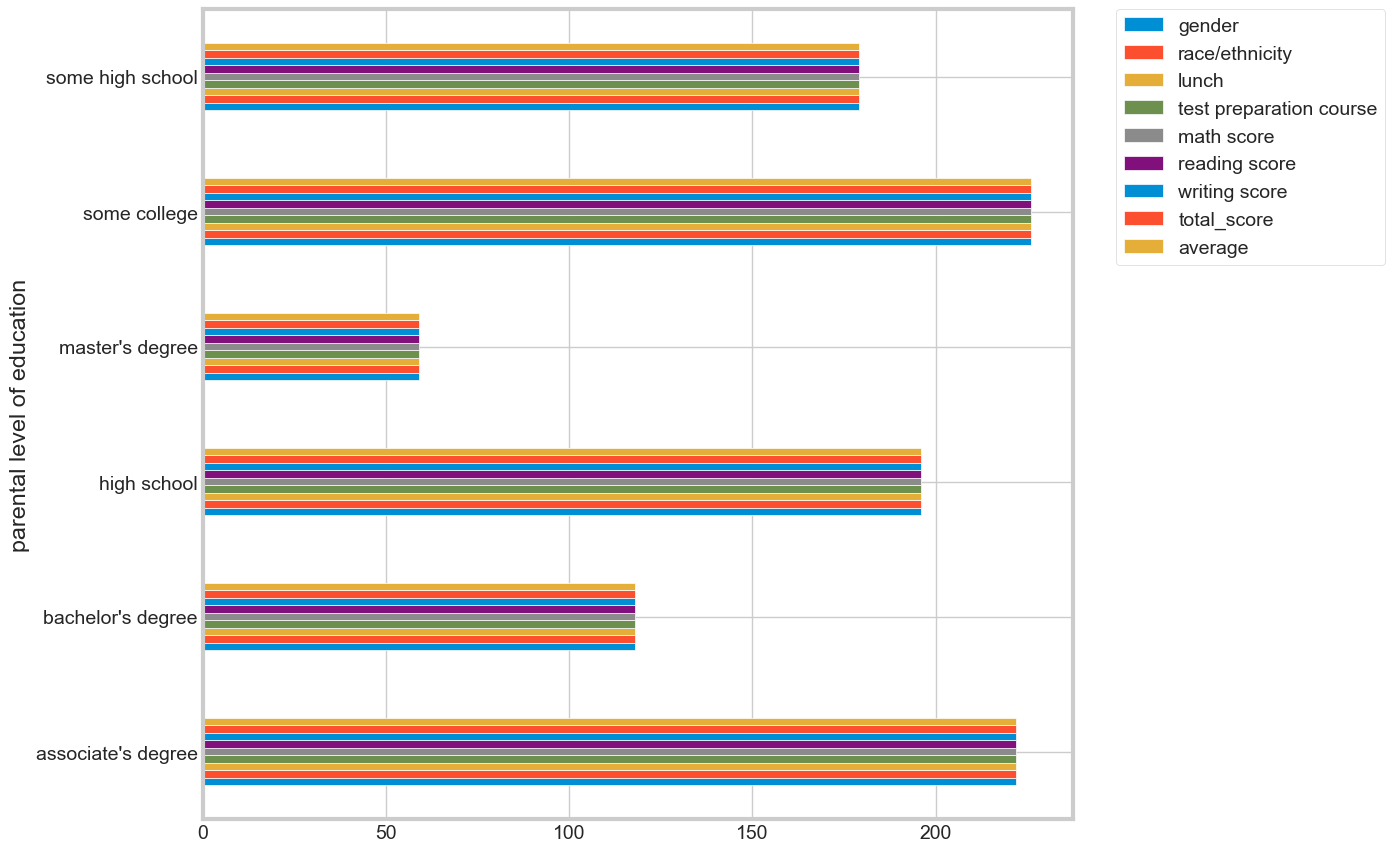

In [39]:
df.groupby('parental level of education').agg('count').plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


##### Is lunch type intake has any impact on student's performance

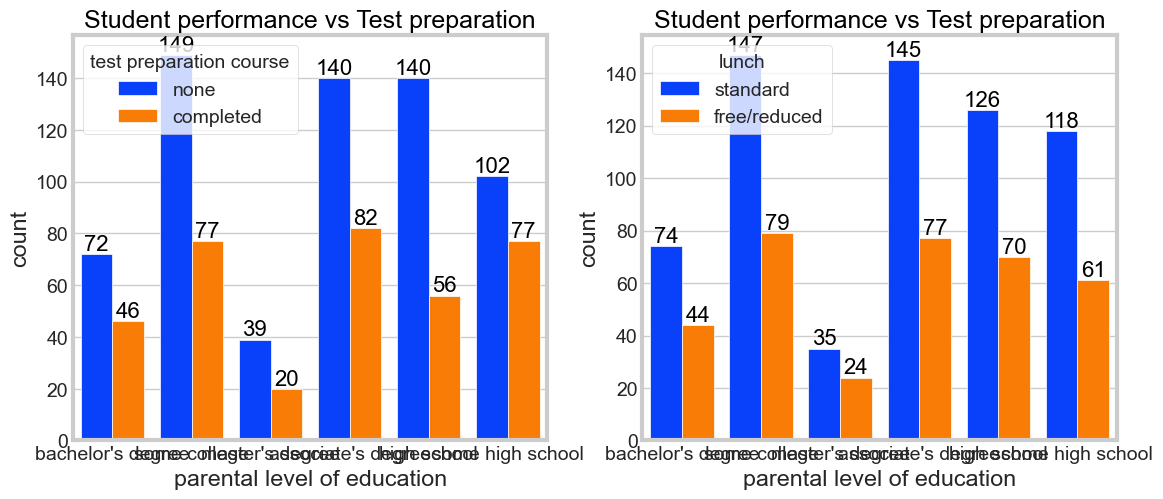

In [40]:
fig, ax =  plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data=df, x=df['parental level of education'], palette='bright', hue='test preparation course', saturation=0.95, ax=ax[0])
ax[0].set_title('Student performance vs Test preparation', color='black', size=18)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=16)


sns.countplot(data=df, x=df['parental level of education'], palette='bright', hue='lunch', saturation=0.95, ax=ax[1])
ax[1].set_title('Student performance vs Test preparation', color='black', size=18)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=16)


##### Is Test prepration course has any impact on student's performance

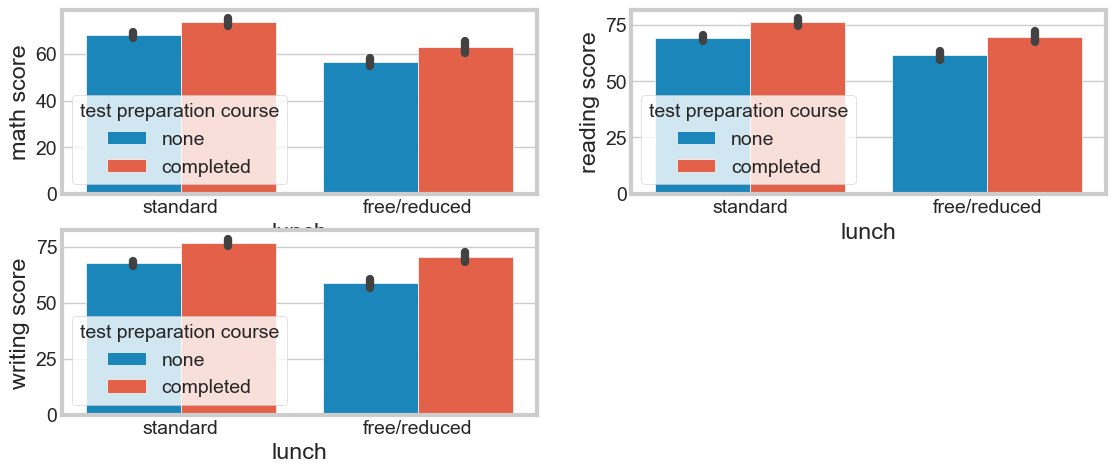

In [41]:
plt.figure(figsize=(12, 5))
plt.subplot(2, 2, 1)
sns.barplot(x=df['lunch'], y=df['math score'], hue=df['test preparation course'])

plt.subplot(2, 2, 2)
sns.barplot(x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])

plt.subplot(2, 2, 3)
sns.barplot(x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])
plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average                      1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.3+ KB


##### Checking Outliers

<Axes: ylabel='average'>

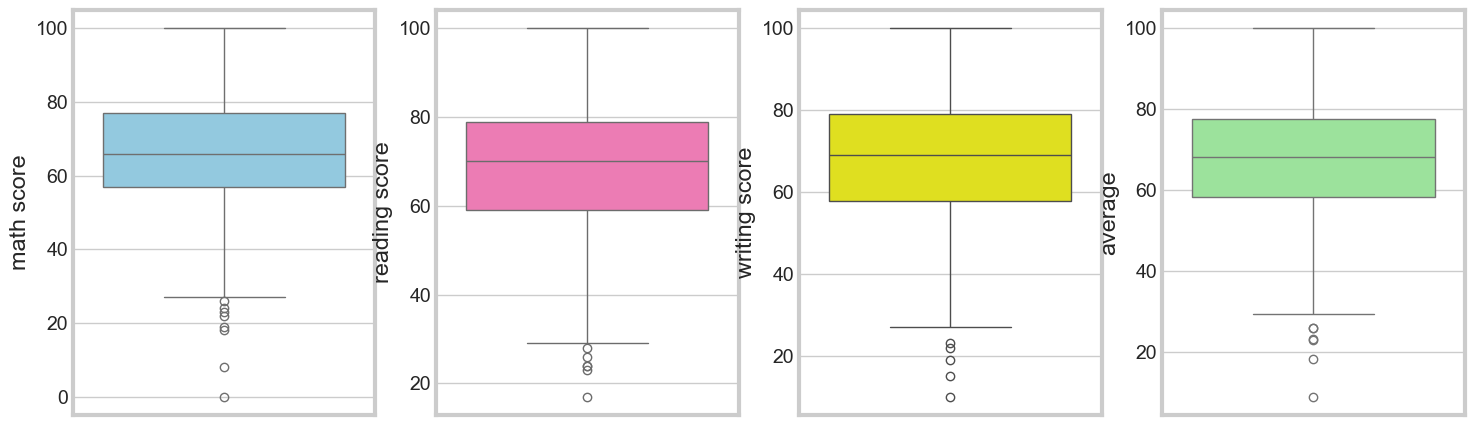

In [43]:
plt.subplots(1, 4, figsize=(16, 5))
plt.subplot(141)
sns.boxplot(df['math score'], color='skyblue')

plt.subplot(142)
sns.boxplot(df['reading score'], color='hotpink')

plt.subplot(143)
sns.boxplot(df['writing score'], color='yellow')

plt.subplot(144)
sns.boxplot(df['average'], color='lightgreen')

#### Multivariate Analysis using Pairplot

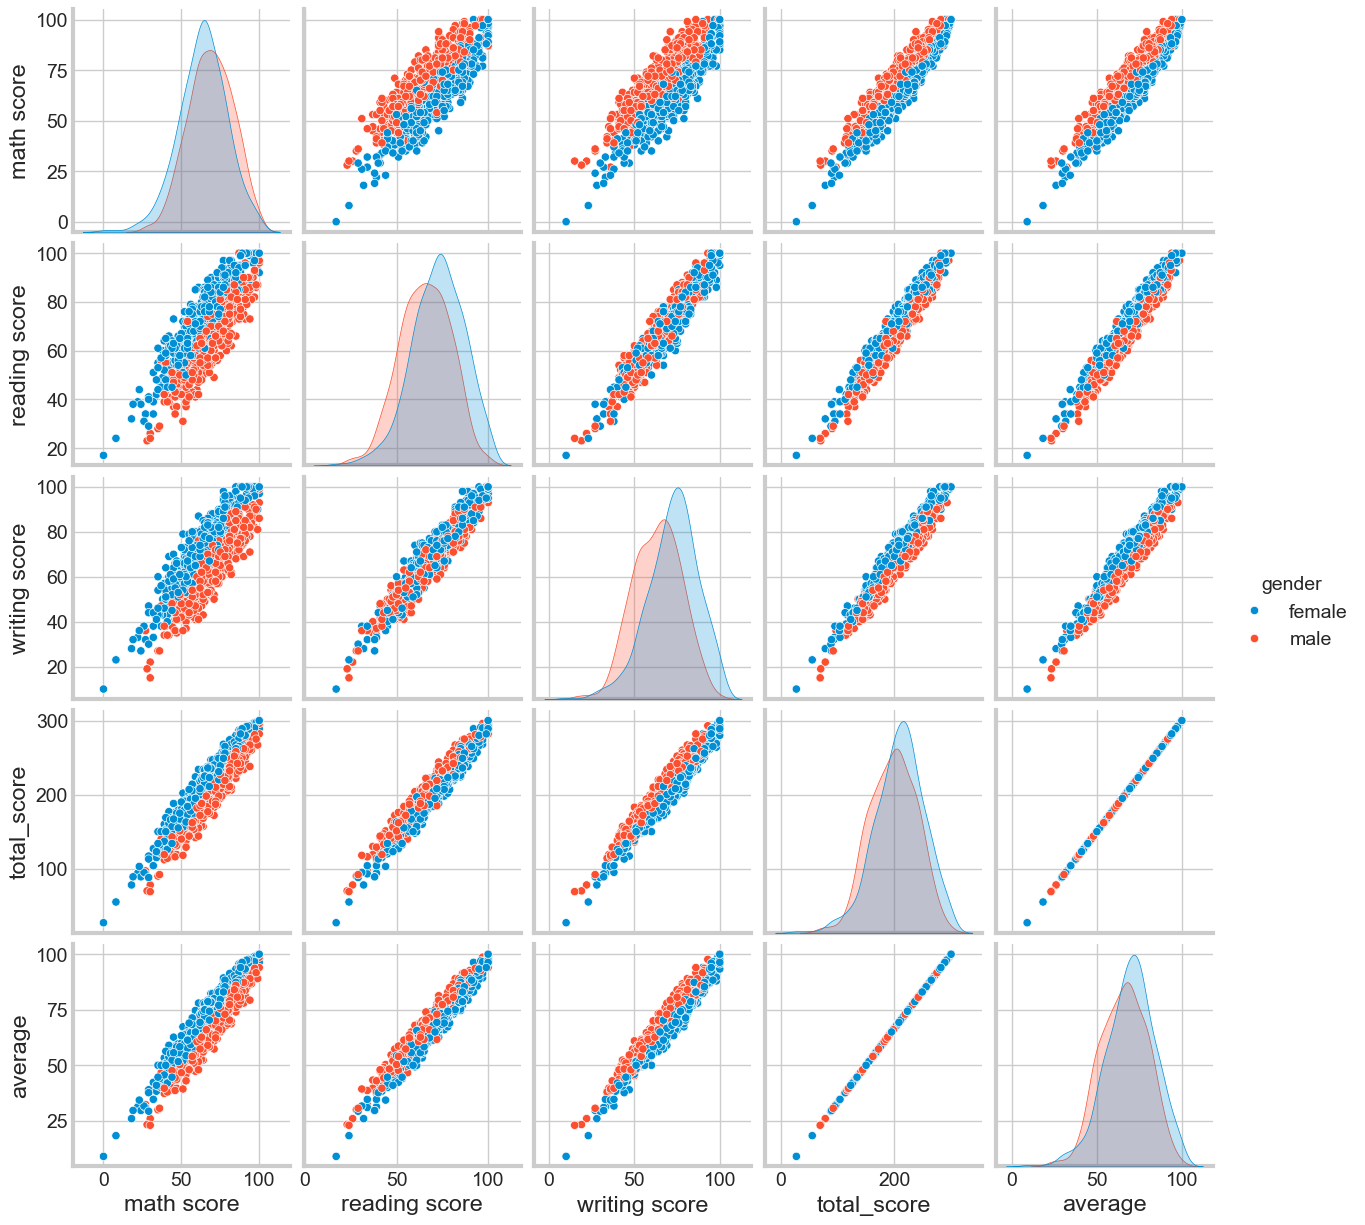

In [44]:
sns.pairplot(df, hue='gender')
plt.show()